Первый метод — [```pd.iterrows()```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iterrows.html), на каждой итерации возвращает строку датафрейма в виде пар ```(index, series)```, где первый элемент является индексом, а содержимое самого ряда представляется в виде ```Series```. Таким образом, можно использовать его в цикле, например:
```python
for index, row in df[:1].iterrows():
    print(f"Тип индекса: {type(index)},\nТип содержимого строки: {type(row)}")
```

```python
Тип индекса: < class 'int' >,
Тип содержимого строки: < class 'pandas.core.series.Series' >
```

Посмотрим, в каком формате возвращается содержимое строки:
```python
for index, row in df[:2].iterrows():
    print("Индекс: {},\nСодержимое строки:\n{}\n".format(index, row))
```
```python
Индекс: 0,
Содержимое строки:
key                  2009-06-15 17:26:21.0000001
fare_amount                                  4.5
pickup_datetime        2009-06-15 17:26:21+00:00
pickup_longitude                        -73.8443
pickup_latitude                          40.7213
dropoff_longitude                       -73.8416
dropoff_latitude                         40.7123
passenger_count                                1
Name: 0, dtype: object

Индекс: 1,
Содержимое строки:
key                  2010-01-05 16:52:16.0000002
fare_amount                                 16.9
pickup_datetime        2010-01-05 16:52:16+00:00
pickup_longitude                         -74.016
pickup_latitude                          40.7113
dropoff_longitude                       -73.9793
dropoff_latitude                          40.782
passenger_count                                1
Name: 1, dtype: object
```
К конкретным колонкам тоже можно обратиться. Так, выведем индекс и число пассажиров для первых трех наблюдений:
```python
for index, row in df[:3].iterrows():
    print("Индекс {}; Число пассажиров: {}".format(index, row['passenger_count']))
```

```python
Индекс 0; Число пассажиров: 1
Индекс 1; Число пассажиров: 1
Индекс 2; Число пассажиров: 2
```
Этот метод является одним из наименее эффективных, подробнее о причинах можно почитать вот [здесь](https://stackoverflow.com/questions/24870953/does-pandas-iterrows-have-performance-issues/24871316#24871316). Тем не менее, работает быстрее, чем самые обычные циклы.

Задача – написать функцию ```haversine``` для подсчета расстояния между пунктами отправления и прибытия и, используя ```pd.iterrows()```, создать колонку ```distance``` с подсчитанным расстоянием. Более подробно ознакомиться с формулой можно [здесь](https://medium.com/@congyuzhou/%D1%80%D0%B0%D1%81%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D0%B5-%D0%BC%D0%B5%D0%B6%D0%B4%D1%83-%D0%B4%D0%B2%D1%83%D0%BC%D1%8F-%D1%82%D0%BE%D1%87%D0%BA%D0%B0%D0%BC%D0%B8-%D0%BD%D0%B0-%D0%BF%D0%BE%D0%B2%D0%B5%D1%80%D1%85%D0%BD%D0%BE%D1%81%D1%82%D0%B8-%D0%B7%D0%B5%D0%BC%D0%BB%D0%B8-a398352bfbde).


$$ \large d = 2r\arcsin\left(\sqrt{\sin^{2}\left(\frac{\varphi_2-\varphi_1}{2}\right)+\cos(\varphi_1)\cos(\varphi_2)\sin^{2}\left(\frac{\lambda_2-\lambda_1}{2}\right)}\right) $$

$\varphi_1$ и $\varphi_2$ — широта исходного местоположения и широта пункта назначения **в радианах**,

$\lambda_1$ и $\lambda_2$ — долгота исходного местоположения и долгота пункта назначения **в радианах**,

$r$ — радиус сферы, будем считать его равным ```6371```.

Таким образом, сама функция ```haversine()``` должна принимать на вход 5 параметров, один из которых должен иметь значение **по умолчанию**.

```python
def haversine(..., ..., ..., ..., radius=6371):
    # ваш код
```

Саму функцию можно применить как используя обычный цикл...

```python
dists = [ ]
for i, row in df.iterrows():
    dists.append(haversine(row['...'], ..., ..., ...))
df['distance'] = dists
```
...так и используя более компактный вариант:

```python
df['distance'] = pd.Series(haversine(row['...'], ..., ..., ...) for i, row in df.iterrows())
```
Датасет, с которым мы будем работать – данные о поездках в Нью-Йорке.

* ```pickup_datetime``` — дата начала поездки
* ```pickup_longitude``` — долгота исходного местоположения
* ```pickup_latitude``` — широта исходного местоположения
* ```dropoff_longitude``` — долгота пункта назначения
* ```dropoff_latitude``` — широта пункта назначения
* ```fare_amount``` — стоимость поездки в долларах 
* ```passenger_count``` — число пассажиров


In [2]:
import pandas as pd
import numpy as np

In [3]:
def haversine(latitude1, longitude1, latitude2, longitude2, r = 6371):
    latitude1, longitude1, latitude2, longitude2 = [np.deg2rad(x) for x in (latitude1, longitude1, latitude2, longitude2)]
    sin_d_lat = np.sin((latitude2 - latitude1) / 2) ** 2
    sin_d_lon = np.sin((longitude2 - longitude1) / 2) ** 2
    cos_lats = np.cos(latitude1) * np.cos(latitude2)
    return 2 * r * np.arcsin(np.sqrt(sin_d_lat + cos_lats * sin_d_lon))

In [4]:
haversine(0, 0, 1, 1)

157.24938127194397

In [5]:
df = pd.read_csv('https://stepik.org/media/attachments/lesson/363873/nyc.csv.zip')

In [6]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [16]:
%%timeit
distance = []
for i, row in df.iterrows():
    d = haversine(row['pickup_latitude'], row['pickup_longitude'], row['dropoff_latitude'], row['dropoff_longitude'])
    distance.append(d)
df['distance'] = distance

# краткая запись
df['distance'] = pd.Series(haversine(row['pickup_latitude'], 
                                     row['pickup_longitude'], 
                                     row['dropoff_latitude'], 
                                     row['dropoff_longitude']) for i, row in df.iterrows())

5.75 s ± 108 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [8]:
df.head(2)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134


На первый взгляд, ```pd.iterrows()``` хорошо справляется со своей задачей и выполнение операции не занимает много времени. 

Метод [```pd.itertuples```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.itertuples.html#pandas.DataFrame.itertuples), который на каждой итерации возвращает именованный кортеж (```named tuple```) для каждой строки датафрейма. Параметр ```index``` по умолчанию равен ```True```, поэтому первым элементом кортежа следует индекс, далее — содержимое строки.

```python
for row in df[:1].itertuples(name='ride'):  # исп. "ride" как название
    print(f"Тип содержимого: {type(row)}")
```

```python
Тип содержимого: < class 'pandas.core.frame.ride' >
```

Посмотрим на формат вывода:
```python
for row in df[:2].itertuples(name='custom_name'):
    print(row)
```

```python
custom_name(Index=0, 
            key='2009-06-15 17:26:21.0000001', 
            fare_amount=4.5, 
            pickup_datetime=Timestamp('2009-06-15 17:26:21+0000', tz='UTC'), 
            pickup_longitude=-73.844311, 
            pickup_latitude=40.721319, 
            dropoff_longitude=-73.84161, 
            dropoff_latitude=40.71227800000001, 
            passenger_count=1)
custom_name(Index=1, 
            key='2010-01-05 16:52:16.0000002', 
            fare_amount=16.9, 
            pickup_datetime=Timestamp('2010-01-05 16:52:16+0000', tz='UTC'), 
            pickup_longitude=-74.016048, 
            pickup_latitude=40.711303, 
            dropoff_longitude=-73.979268, 
            dropoff_latitude=40.782004, 
            passenger_count=1)
custom_name(Index=2, 
            key='2011-08-18 00:35:00.00000049', 
            fare_amount=5.7, 
            pickup_datetime=Timestamp('2011-08-18 00:35:00+0000', tz='UTC'), 
            pickup_longitude=-73.982738, 
            pickup_latitude=40.76127, 
            dropoff_longitude=-73.991242, 
            dropoff_latitude=40.750562, 
            passenger_count=2)
```

Индекс и число пассажиров для первых трех наблюдений:
```python
for row in df[:3].itertuples():
    print("Индекс {}; Число пассажиров: {}".format(row.Index, row.passenger_count))
```
```python
Индекс 0; Число пассажиров: 1
Индекс 1; Число пассажиров: 1
Индекс 2; Число пассажиров: 2
```

Проделаем ту же операцию, что и в предыдущем шаге, но уже используя ```pd.itertuples()```, а затем сравним время выполнения.

In [15]:
%%timeit
distance = []
for row in df.itertuples():
    d = haversine(row.pickup_latitude, 
                  row.pickup_longitude, 
                  row.dropoff_latitude, 
                  row.dropoff_longitude)
    distance.append(d)
df['distance'] = distance

865 ms ± 33 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Еще один часто используемый метод ```pd.apply()``` применяет заданную функцию вдоль определенной оси (```axis=0``` – строки; ```axis=1``` – столбцы), и является более эффективным способом, чем ```pd.iterrows()``` за счет использования внутренних оптимизаций в pandas. Тем не менее, все равно подразумевает итерацию по всем рядам.
```python
df['distance'] = df[['col1', 'col2', 'col3', 'col4']] \
                .apply(lambda row: haversine(row[0], row[1], row[2], row[3]), axis=1)

# более медленный вариант
df['distance'] = df.apply(lambda x: haversine(x['col1'], x['col2'], x['col3'], x['col4']), axis=1)
```


In [17]:
%%timeit

df['distance'] = df[['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']] \
                .apply(lambda row: haversine(row[0], row[1], row[2], row[3]), axis=1)

1.48 s ± 43.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [18]:
%%timeit

df['distance'] = df.apply(lambda x: haversine(x['pickup_latitude'], 
                                              x['pickup_longitude'], 
                                              x['dropoff_latitude'], 
                                              x['dropoff_longitude']), 
                                              axis=1)

1.7 s ± 33.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [21]:
longest = df.distance.max()
longest

8667.818812217458

In [25]:
%%timeit

df['distance'] = haversine(df.pickup_latitude, 
                           df.pickup_longitude, 
                           df.dropoff_latitude, 
                           df.dropoff_longitude)

8.63 ms ± 366 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [26]:
%%timeit

df['distance'] = haversine(df.pickup_latitude.values, 
                           df.pickup_longitude.values, 
                           df.dropoff_latitude.values, 
                           df.dropoff_longitude.values)

5.32 ms ± 190 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [34]:
nyc = pd.read_csv('https://stepik.org/media/attachments/lesson/363873/nyc.csv.zip')

In [35]:
nyc.query('dropoff_longitude == 0 or dropoff_latitude == 0').shape

(958, 8)

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d980d6518>,
      dtype=object)

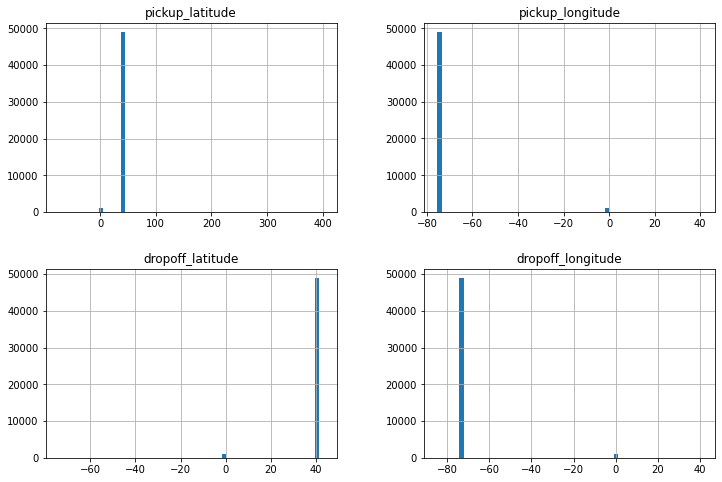

In [45]:
nyc[['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']].hist(figsize=(12, 8), bins=60)

* 10 < pickup_latitude < 120
* pickup_longitude < -60
* 10 < dropoff_latitude
* dropoff_longitude < -60

In [47]:
nyc['distance'] = haversine(nyc.pickup_latitude.values, 
                           nyc.pickup_longitude.values, 
                           nyc.dropoff_latitude.values, 
                           nyc.dropoff_longitude.values)

In [49]:
filtered = nyc.query('(10 < pickup_latitude < 120) & (pickup_longitude < -60) & (10 < dropoff_latitude) & (dropoff_longitude < -60) & (distance <= 50)')

In [60]:
filtered.query('distance == distance.max()') \
    .fare_amount

33502    136.0
Name: fare_amount, dtype: float64